In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing all datasets
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
lead = lead.drop(['Country','Asymmetrique Activity Index','Update me on Supply Chain Content','Get updates on DM Content',
                  'Asymmetrique Profile Index','Asymmetrique Activity Score','Search','Magazine','Newspaper Article','Newspaper',
                  'Asymmetrique Profile Score','I agree to pay the amount through cheque','X Education Forums','Digital Advertisement',
                  'Last Notable Activity','Lead Origin','Prospect ID','Do Not Call','Do Not Email','Lead Quality',
                  'How did you hear about X Education','A free copy of Mastering The Interview','Lead Number',
                  'Receive More Updates About Our Courses','Through Recommendations'],axis = 1)

In [9]:
lead.isnull().sum()

Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Profile                                     2709
City                                             1420
dtype: int64

In [10]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9204 non-null   object 
 1   Converted                                      9240 non-null   int64  
 2   TotalVisits                                    9103 non-null   float64
 3   Total Time Spent on Website                    9240 non-null   int64  
 4   Page Views Per Visit                           9103 non-null   float64
 5   Last Activity                                  9137 non-null   object 
 6   Specialization                                 7802 non-null   object 
 7   What is your current occupation                6550 non-null   object 
 8   What matters most to you in choosing a course  6531 non-null   object 
 9   Tags                                           5887 

# Missing Values Imputation

### 1. TotalVisits

In [11]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [12]:
TV_mode = lead.TotalVisits.median()
TV_mode

3.0

In [13]:
lead.TotalVisits.fillna(TV_mode,inplace=True)

### 2. Page Views Per Visit

In [14]:
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [15]:
PV_mode = lead['TotalVisits'].median()
PV_mode

3.0

In [16]:
lead['Page Views Per Visit'].fillna(PV_mode,inplace=True)

### 3.Last Activity

In [17]:
lead['Last Activity'].value_counts(normalize =True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Marked Spam               0.000219
Email Received                  0.000219
Resubscribed to emails          0.000109
Visited Booth in Tradeshow      0.000109
Name: Last Activity, dtype: float64

In [18]:
LA_mode = lead['Last Activity'].mode()[0]
LA_mode

'Email Opened'

In [19]:
lead['Last Activity'].fillna(LA_mode,inplace=True)

### 4.Specialization

In [20]:
lead['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
lead['Specialization'] = lead['Specialization'].replace(['Select',np.nan], 'Not Specified')
lead['Specialization'].value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### 5. What is your current occupation

In [22]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Other')

### 6. What matters most to you in choosing a course

In [24]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Other')

In [26]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: What matters most to you in choosing a course, dtype: int64

### 7. Tags

In [27]:
lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [28]:
lead['Tags'] = lead['Tags'].replace(np.nan,'Not Specified')
lead['Tags'] = lead['Tags'].replace(['Lost to EINS','Not doing further education','Interested  in full time MBA',
                                      'Graduation in progress','invalid number','Diploma holder (Not Eligible)',
                                      'wrong number given','opp hangup','number not provided','in touch with EINS',
                                      'Lost to Others','Want to take admission but has financial problems',
                                      'Still Thinking','Interested in Next batch','Lateral student','Busy','switched off',
                                      'In confusion whether part time or DLP','University not recognized',
                                      'Shall take in the next coming month','Recognition issue (DEC approval)'],'Other Tag')
lead['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Other Tag                              1276
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

In [29]:
lead.isnull().sum()

Lead Source                                        36
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Tags                                                0
Lead Profile                                     2709
City                                             1420
dtype: int64

### 8.City

In [30]:
lead['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [31]:
lead['City'] = lead['City'].replace(np.nan,'Other Cities')
lead['City'] = lead['City'].replace('Select','Not Specified')
lead['City'].value_counts(dropna=False)

Mumbai                         3222
Not Specified                  2249
Other Cities                   2106
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
lead.isnull().sum()

Lead Source                                        36
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Tags                                                0
Lead Profile                                     2709
City                                                0
dtype: int64

### 9.Lead Profile

In [33]:
lead['Lead Profile'] = lead['Lead Profile'].replace('Select','Not Specified')
lead['Lead Profile'] = lead['Lead Profile'].replace(np.nan,'Other Leads')

In [34]:
lead['Lead Profile'].value_counts()

Not Specified                  4146
Other Leads                    3196
Potential Lead                 1613
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [35]:
lead = lead.dropna()

In [36]:
lead.isnull().sum()

Lead Source                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
Lead Profile                                     0
City                                             0
dtype: int64

In [37]:
lead.shape

(9204, 12)

### Observations-
- For the numerical columns we replaced the Missing values with the median of the all the values.
- For the categorical columns we replaced the missing values with what felt necessary
- As well as we worked on the Select option in various columns where in most cases we replaced them with Not Specified.
- Some columns had variable value counts very low so we combined them and replaced them with Others wherever it was required as per our requirement. 

# Handling Outliers

In [38]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9204 non-null   object 
 1   Converted                                      9204 non-null   int64  
 2   TotalVisits                                    9204 non-null   float64
 3   Total Time Spent on Website                    9204 non-null   int64  
 4   Page Views Per Visit                           9204 non-null   float64
 5   Last Activity                                  9204 non-null   object 
 6   Specialization                                 9204 non-null   object 
 7   What is your current occupation                9204 non-null   object 
 8   What matters most to you in choosing a course  9204 non-null   object 
 9   Tags                                           9204 

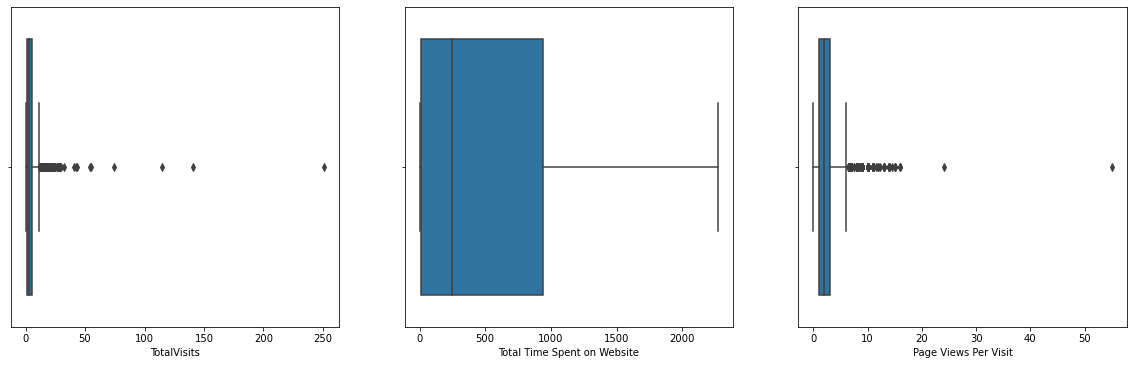

In [39]:
plt.figure(figsize= (20,20))
plt.subplot(331)
sns.boxplot(lead['TotalVisits'])
plt.subplot(332)
sns.boxplot(lead['Total Time Spent on Website'])
plt.subplot(333)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

In [40]:
q2 = lead['TotalVisits'].quantile(0.95)
lead['TotalVisits'][lead['TotalVisits']>=q2] = q2

In [41]:
q2 = lead['Page Views Per Visit'].quantile(0.95)
lead['Page Views Per Visit'][lead['Page Views Per Visit']>=q2] = q2

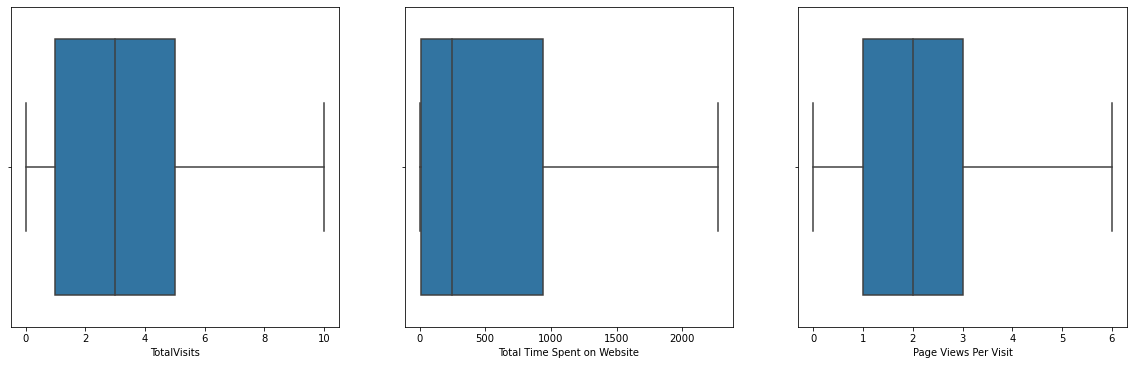

In [42]:
plt.figure(figsize= (20,20))
plt.subplot(331)
sns.boxplot(lead['TotalVisits'])
plt.subplot(332)
sns.boxplot(lead['Total Time Spent on Website'])
plt.subplot(333)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

## Observations -
- On observation it can be seen that TotalVisit and Page Views per Visit have a lot of outliers so we used hardcapping in this case to remove the outliers by removing 5% on both sides.

# Numerical Analysis

In [43]:
lead.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.049517,0.366428,0.004666
TotalVisits,0.049517,1.000000,0.356087,0.765234
Total Time Spent on Website,0.366428,0.356087,1.000000,0.364462
Page Views Per Visit,0.004666,0.765234,0.364462,1.000000


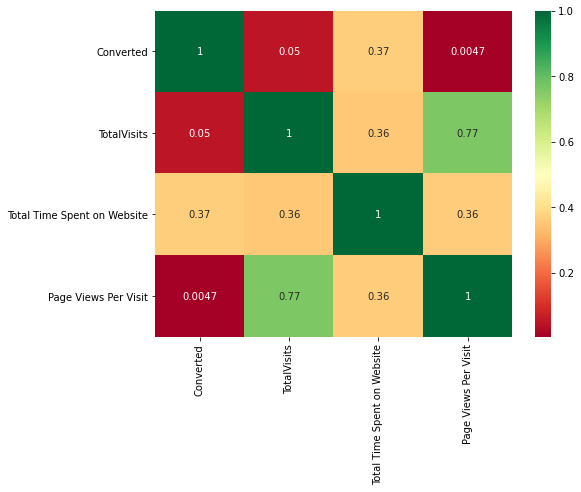

In [44]:
plt.figure(figsize = (8,6))
sns.heatmap(lead.corr(), cmap="RdYlGn", annot=True)
plt.show()

# Analysis Of Categorical Columns

In [45]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
testone                 1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

In [46]:
lead['Lead Source'] = lead['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google',
                                                   'Click2call','Social Media','Press_Release','Live Chat','NC_EDM',
                                                   'blog','welearnblog_Home','WeLearn','youtubechannel',
                                                   'Pay per Click Ads','testone'],'Others')

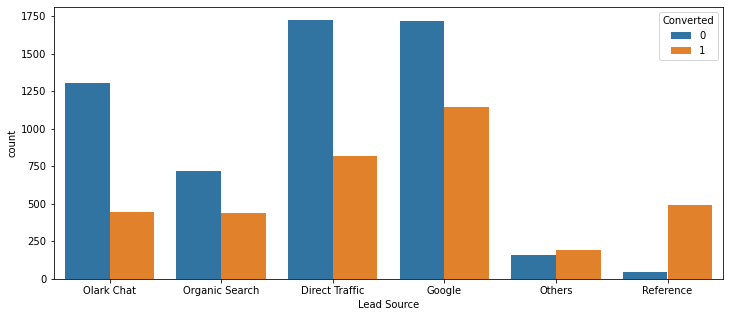

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(lead['Lead Source'], hue=lead.Converted)
plt.show()

### Observation -
- We can see that Lead source is high in case of Google and direct traffic but it is higher for Google
- We also observe that by refence conversion rate is very high.

In [48]:
lead['Last Activity'].value_counts()

Email Opened                    3533
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [49]:
lead['Last Activity'] = lead['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unreachable',
                                                   'Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Marked Spam','Email Received',
                                                   'Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

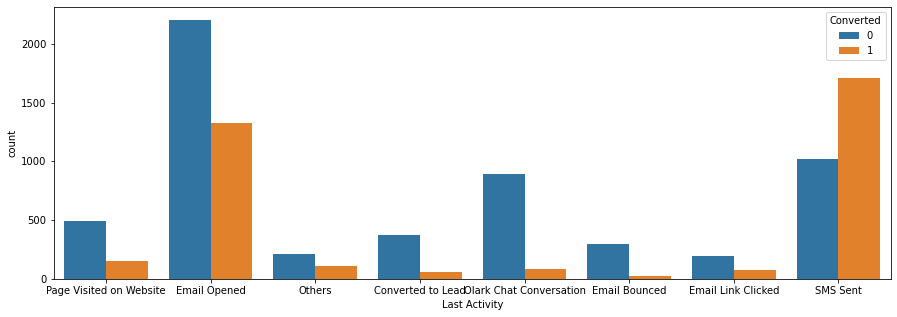

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(lead['Last Activity'], hue=lead.Converted)
plt.show()

### Observation -
- The lead which have Sms sent have a higher rate of conversion into potential lead.

In [51]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9204 non-null   object 
 1   Converted                                      9204 non-null   int64  
 2   TotalVisits                                    9204 non-null   float64
 3   Total Time Spent on Website                    9204 non-null   int64  
 4   Page Views Per Visit                           9204 non-null   float64
 5   Last Activity                                  9204 non-null   object 
 6   Specialization                                 9204 non-null   object 
 7   What is your current occupation                9204 non-null   object 
 8   What matters most to you in choosing a course  9204 non-null   object 
 9   Tags                                           9204 

In [52]:
lead['Specialization'].value_counts()

Not Specified                        3352
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [53]:
lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                        'Marketing Management','Operations Management',
                                                        'IT Projects Management','Supply Chain Management',
                                                        'Healthcare Management','Hospitality Management',
                                                        'Retail Management'],'Management Sector')

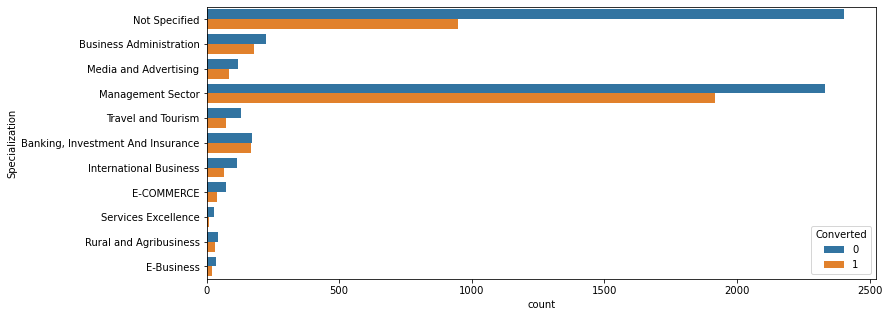

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(y = lead['Specialization'], hue=lead.Converted)
plt.show()

### Observation - 
- We observe that management sector has a higher rate of potential leads.

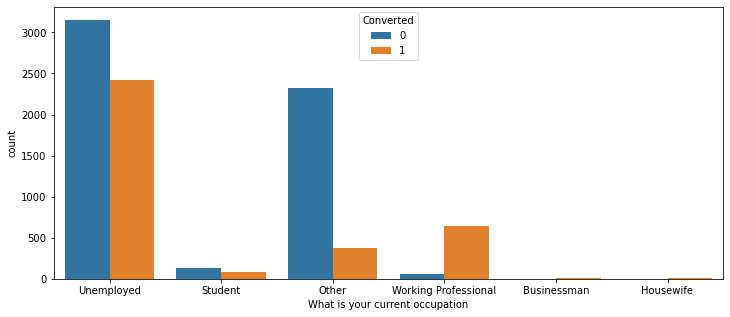

In [55]:
plt.figure(figsize=(12,5))
sns.countplot(lead['What is your current occupation'], hue=lead.Converted)
plt.show()

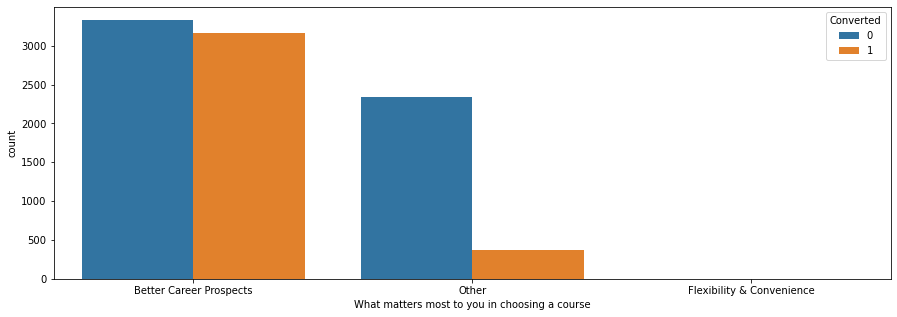

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(lead['What matters most to you in choosing a course'], hue=lead.Converted)
plt.show()

### Observation -
- Leads who enter Better career Prospects as an option while filling the form tend to have a higher rate of potential lead.

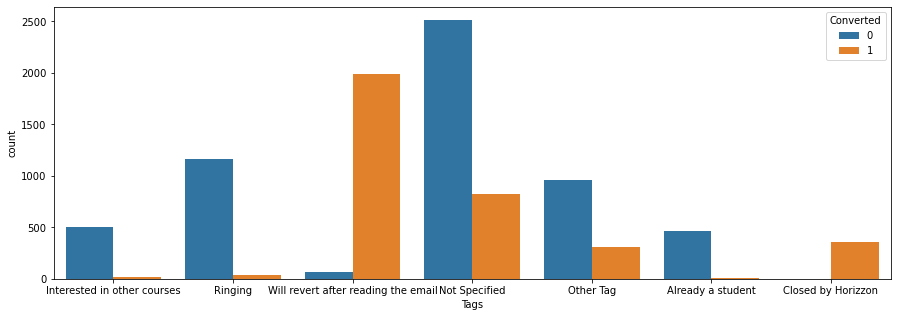

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(lead['Tags'], hue=lead.Converted)
plt.show()

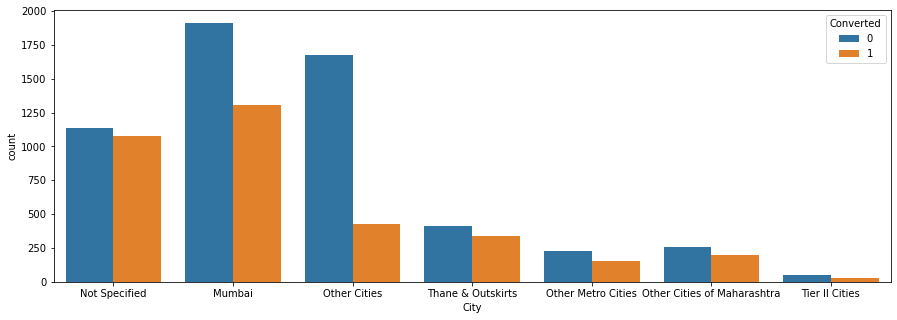

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(lead['City'], hue=lead.Converted)
plt.show()

In [59]:
lead['Lead Profile'].value_counts()

Not Specified                  4115
Other Leads                    3196
Potential Lead                 1608
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [60]:
lead['Lead Profile'] = lead['Lead Profile'].replace(['Student of SomeSchool','Lateral Student',
                                                     'Dual Specialization Student'],'Student')

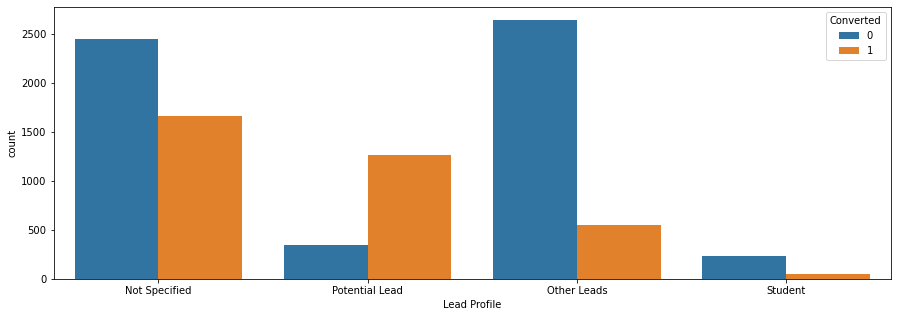

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(lead['Lead Profile'], hue=lead.Converted)
plt.show()

# Dummy Variable Creation

In [62]:
cat_col= lead.select_dtypes(include=['object']).columns
cat_col

Index(['Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City'],
      dtype='object')

In [63]:
# Creating dummy variables for the variable 'Lead Source'
dummy = pd.get_dummies(lead['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others','Lead Source_Reference'],1)
lead = pd.concat([lead, dummy], axis = 1)

# Creating dummy variables for the variable 'Last Activity'
dummy = pd.get_dummies(lead['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others','Last Activity_Email Bounced','Last Activity_Email Link Clicked'],1)
lead = pd.concat([lead, dummy], axis = 1)

# Creating dummy variables for the variable 'Specialization'
dummy = pd.get_dummies(lead['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified','Specialization_Services Excellence','Specialization_Rural and Agribusiness',
                   'Specialization_E-Business'],1)
lead = pd.concat([lead, dummy], axis = 1)

# Creating dummy variables for the variable 'What is your current occupation'
dummy = pd.get_dummies(lead['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Other'], 1)
lead = pd.concat([lead, dummy], axis = 1)

# Creating dummy variables for the variable 'What matters most to you in choosing a course'
dummy = pd.get_dummies(lead['What matters most to you in choosing a course'], prefix  = 'What matters most to you in choosing a course')
dummy = dummy.drop(['What matters most to you in choosing a course_Other','What matters most to you in choosing a course_Flexibility & Convenience'], 1)
lead = pd.concat([lead, dummy], axis = 1)

# Creating dummy variables for the variable 'Tags'
dummy = pd.get_dummies(lead['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified',], 1)
lead = pd.concat([lead, dummy], axis = 1)

# Creating dummy variables for the variable 'Lead Profile'
dummy = pd.get_dummies(lead['Lead Profile'], prefix  = 'Lead Profile')
dummy = dummy.drop(['Lead Profile_Other Leads'], 1)
lead = pd.concat([lead, dummy], axis = 1)

# Creating dummy variables for the variable 'City'
dummy = pd.get_dummies(lead['City'], prefix  = 'City')
dummy = dummy.drop(['City_Not Specified'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [64]:
lead.drop(cat_col,1,inplace = True)

In [65]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Converted                                                              9204 non-null   int64  
 1   TotalVisits                                                            9204 non-null   float64
 2   Total Time Spent on Website                                            9204 non-null   int64  
 3   Page Views Per Visit                                                   9204 non-null   float64
 4   Lead Source_Direct Traffic                                             9204 non-null   uint8  
 5   Lead Source_Google                                                     9204 non-null   uint8  
 6   Lead Source_Olark Chat                                                 9204 non-null   u

# Scaling of Data

In [66]:
num_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lead[num_col] = scaler.fit_transform(lead[num_col])

In [68]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Converted to Lead,Last Activity_Email Opened,...,Tags_Will revert after reading the email,Lead Profile_Not Specified,Lead Profile_Potential Lead,Lead Profile_Student,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,-1.155135,-0.892426,-1.278605,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0.655900,0.337612,0.125646,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,-0.430721,1.903446,-0.155204,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
3,0,-0.792928,-0.335807,-0.716905,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1,-0.430721,1.713648,-0.716905,0,1,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0


# Model Building

In [69]:
X = lead.drop('Converted',axis = 1)
y = lead['Converted']

In [70]:
X.shape

(9204, 40)

In [71]:
y.shape

(9204,)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

#### Running Your First Training Model

In [73]:
import statsmodels.api as sm

In [74]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6401
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1445.4
Date:                Sat, 06 Feb 2021   Deviance:                       2890.8
Time:                        22:11:53   Pearson chi2:                 8.65e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.3975      0.296     -4.724      0.000      -1.977      -0.818
TotalVisits                                                               0.3457      0.078      4.422      0.000       0.192       0.499
Total Time Spent on Website                                               1.1144      0.057     19.578      0.000       1.003       1.226
Page Views Per Visit                                                     -0.4617      0.088     -5.254      0.000      -0.634      -0.289
Lead Source_Direct Traffic                                               -1.0711      0.226     -4.746      0.000      -1.513      -0.629
Lead Source_Google                                                       -1.1085      0.217     -5.103      0.000      -1.534      -0.683
Lead Source_Olark Chat                                                   -0.1159      0.216     -0.536      0.592      -0.540       0.308
Lead Source_Organic Search                                               -1.0455      0.251     -4.170      0.000      -1.537      -0.554
Last Activity_Converted to Lead                                          -0.3509      0.324     -1.083      0.279      -0.986       0.284
Last Activity_Email Opened                                                0.7668      0.184      4.158      0.000       0.405       1.128
Last Activity_Olark Chat Conversation                                    -0.8527      0.266     -3.201      0.001      -1.375      -0.331
Last Activity_Page Visited on Website                                    -0.1847      0.268     -0.689      0.491      -0.710       0.341
Last Activity_SMS Sent                                                    2.1820      0.188     11.612      0.000       1.814       2.550
Specialization_Banking, Investment And Insurance                          0.2219      0.322      0.690      0.490      -0.409       0.853
Specialization_Business Administration                                    0.0994      0.278      0.358      0.720      -0.445       0.643
Specialization_E-COMMERCE                                                 0.4072      0.424      0.960      0.337      -0.424       1.238
Specialization_International Business                                    -0.3819      0.384     -0.995      0.320      -1.134       0.370
Specialization_Management Sector                                          0.1783      0.170      1.046      0.295      -0.156       0.512
Specialization_Media and Advertising                                     -0.2228      0.353     -0.631      0.528      -0.914       0.469
Specialization_Travel and Tourism              

###  Feature Selection Using RFE

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [76]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [77]:
rfe.support_

array([False,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True,  True, False])

In [78]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 17),
 ('Lead Source_Organic Search', True, 1),
 ('Last Activity_Converted to Lead', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 18),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-COMMERCE', False, 14),
 ('Specialization_International Business', False, 5),
 ('Specialization_Management Sector', False, 19),
 ('Specialization_Media and Advertising', False, 11),
 ('Specialization_Travel and Tourism', True, 1),
 ('What is your current occupation_Businessman', False, 6),
 ('What is your current occupation_Housewife', False, 12),
 ('Wha

In [79]:
col = X_train.columns[rfe.support_]

In [80]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management Sector',
       'Specialization_Media and Advertising',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Not Specified', 'Lead Profile_Student', 'City_Mumbai',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Tier II Cities'],
      dtype='object')

##### Assessing the model with StatsModels

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1475.6
Date:                Sat, 06 Feb 2021   Deviance:                       2951.2
Time:                        22:11:54   Pearson chi2:                 8.20e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.8949      0.162    -11.706      0.000      -2.212      -1.578
Total Time Spent on Website                                               1.1005      0.055     19.856      0.000       0.992       1.209
Lead Source_Direct Traffic                                               -1.3042      0.151     -8.665      0.000      -1.599      -1.009
Lead Source_Google                                                       -1.3329      0.143     -9.290      0.000      -1.614      -1.052
Lead Source_Organic Search                                               -1.2785      0.177     -7.203      0.000      -1.626      -0.931
Last Activity_Email Opened                                                0.8362      0.141      5.925      0.000       0.560       1.113
Last Activity_Olark Chat Conversation                                    -0.7297      0.234     -3.115      0.002      -1.189      -0.271
Last Activity_SMS Sent                                                    2.2223      0.143     15.532      0.000       1.942       2.503
Specialization_Travel and Tourism                                        -1.2695      0.350     -3.631      0.000      -1.955      -0.584
What matters most to you in choosing a course_Better Career Prospects     2.2563      0.135     16.714      0.000       1.992       2.521
Tags_Already a student                                                   -4.7864      0.604     -7.928      0.000      -5.970      -3.603
Tags_Closed by Horizzon                                                   5.0463      1.013      4.981      0.000       3.061       7.032
Tags_Interested in other courses                                         -3.6651      0.354    -10.344      0.000      -4.360      -2.971
Tags_Other Tag                                                           -1.4944      0.148    -10.084      0.000      -1.785      -1.204
Tags_Ringing                                                             -4.7758      0.267    -17.916      0.000      -5.298      -4.253
Tags_Will revert after reading the email                                  2.6392      0.209     12.634      0.000       2.230       3.049
Lead Profile_Potential Lead                                               0.7308      0.175      4.188      0.000       0.389       1.073
City_Other Metro Cities                                                  -0.3173      0.249     -1.272      0.203      -0.806       0.171
City_Thane & Outskirts                                                   -0.3138      0.193     -1.625      0.104      -0.692       0.065
===============================================

In [82]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3944    0.899419
6084    0.026423
6244    0.002157
3029    0.006590
3275    0.553667
5865    0.100195
8568    0.996864
4848    0.005666
240     0.756139
579     0.000734
dtype: float64

In [83]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([8.99418534e-01, 2.64232403e-02, 2.15700638e-03, 6.59038765e-03,
       5.53666780e-01, 1.00195115e-01, 9.96864212e-01, 5.66611303e-03,
       7.56138885e-01, 7.33811392e-04])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [84]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID
0,1,0.899419,3944
1,0,0.026423,6084
2,0,0.002157,6244
3,0,0.006590,3029
4,0,0.553667,3275


In [85]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,1,0.899419,3944,1
1,0,0.026423,6084,0
2,0,0.002157,6244,0
3,0,0.006590,3029,0
4,0,0.553667,3275,1


In [86]:
from sklearn import metrics

In [87]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3756  207]
 [ 345 2134]]


In [88]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9143123253647936


## Checking VIF

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What matters most to you in choosing a course_...,9.46
14,Tags_Will revert after reading the email,4.06
12,Tags_Other Tag,2.58
13,Tags_Ringing,2.53
6,Last Activity_SMS Sent,2.02
4,Last Activity_Email Opened,2.01
1,Lead Source_Direct Traffic,1.90
2,Lead Source_Google,1.88
9,Tags_Already a student,1.70
15,Lead Profile_Potential Lead,1.67


In [91]:
col = col.drop(['What matters most to you in choosing a course_Better Career Prospects'],1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Other Tag', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Lead Profile_Potential Lead', 'City_Other Metro Cities',
       'City_Thane & Outskirts'],
      dtype='object')

In [92]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1631.1
Date:                Sat, 06 Feb 2021   Deviance:                       3262.2
Time:                        22:11:54   Pearson chi2:                 8.27e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0468      0.142     -7.385      0.000      -1.325      -0.769
Total Time Spent on Website                  1.1014      0.053     20.864      0.000       0.998       1.205
Lead Source_Direct Traffic                  -1.6903      0.143    -11.822      0.000      -1.970      -1.410
Lead Source_Google                          -1.5542      0.134    -11.599      0.000      -1.817      -1.292
Lead Source_Organic Search                  -1.5014      0.168     -8.952      0.000      -1.830      -1.173
Last Activity_Email Opened                   0.8877      0.135      6.571      0.000       0.623       1.152
Last Activity_Olark Chat Conversation       -0.8789      0.222     -3.953      0.000      -1.315      -0.443
Last Activity_SMS Sent                       2.3080      0.138     16.778      0.000       2.038       2.578
Specialization_Travel and Tourism           -1.2503      0.343     -3.644      0.000      -1.923      -0.578
Tags_Already a student                      -3.1956      0.598     -5.347      0.000      -4.367      -2.024
Tags_Closed by Horizzon                      6.5664      1.010      6.501      0.000       4.587       8.546
Tags_Interested in other courses            -2.2019      0.342     -6.441      0.000      -2.872      -1.532
Tags_Other Tag                               0.0211      0.115      0.183      0.855      -0.204       0.246
Tags_Ringing                                -3.2232      0.247    -13.076      0.000      -3.706      -2.740
Tags_Will revert after reading the email     4.2184      0.189     22.361      0.000       3.849       4.588
Lead Profile_Potential Lead                  0.8783      0.174      5.046      0.000       0.537       1.219
City_Other Metro Cities                     -0.4009      0.237     -1.694      0.090      -0.865       0.063
City_Thane & Outskirts                      -0.4491      0.186     -2.415      0.016      -0.814      -0.085
============================================================================================================
"""

In [93]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [94]:
y_train_pred[:10]

array([6.56499202e-01, 5.17286549e-02, 2.22839585e-03, 5.99700533e-03,
       2.41946227e-01, 1.86953370e-02, 9.97385143e-01, 4.68808755e-03,
       7.46356068e-01, 6.06826341e-04])

In [95]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [96]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,Lead Score
0,1,0.656499,3944,1,66
1,0,0.051729,6084,0,5
2,0,0.002228,6244,0,0
3,0,0.005997,3029,0,1
4,0,0.241946,3275,0,24


In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8987891959018938


##### Let's check the VIFs again

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Tags_Will revert after reading the email,2.19
1,Lead Source_Direct Traffic,1.90
4,Last Activity_Email Opened,1.89
2,Lead Source_Google,1.86
6,Last Activity_SMS Sent,1.86
14,Lead Profile_Potential Lead,1.67
3,Lead Source_Organic Search,1.40
12,Tags_Ringing,1.40
11,Tags_Other Tag,1.39
0,Total Time Spent on Website,1.24


## Metrics beyond simply accuracy

In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8608309802339653

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.9477668433005298

In [102]:
print(FP/ float(TN+FP))

0.052233156699470096


In [103]:
# positive predictive value 
print (TP / float(TP+FP))

0.9115762494660401


In [104]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9158741770299926


## Plotting the ROC Curve

In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

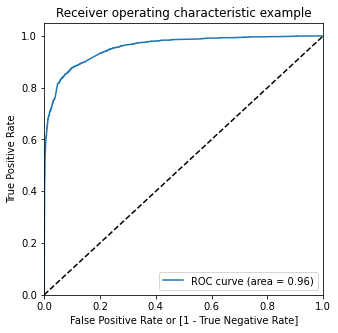

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cutoff Point

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.656499,3944,1,66,1,1,1,1,1,1,1,0,0,0
1,0,0.051729,6084,0,5,1,0,0,0,0,0,0,0,0,0
2,0,0.002228,6244,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0.005997,3029,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.241946,3275,0,24,1,1,1,0,0,0,0,0,0,0


In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384818  1.000000  0.000000
0.1   0.1  0.784539  0.972166  0.667171
0.2   0.2  0.839025  0.945139  0.772647
0.3   0.3  0.885750  0.884228  0.886702
0.4   0.4  0.895374  0.854780  0.920767
0.5   0.5  0.898789  0.829770  0.941963
0.6   0.6  0.883421  0.754336  0.964169
0.7   0.7  0.877523  0.723679  0.973757
0.8   0.8  0.869761  0.684954  0.985365
0.9   0.9  0.852220  0.629689  0.991421


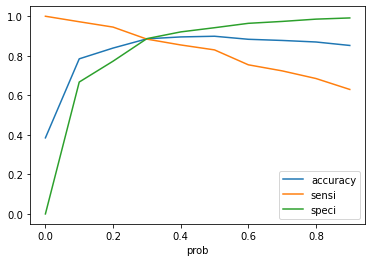

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations
-From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.656499,3944,1,66,1,1,1,1,1,1,1,0,0,0,1
1,0,0.051729,6084,0,5,1,0,0,0,0,0,0,0,0,0,0
2,0,0.002228,6244,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.005997,3029,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0.241946,3275,0,24,1,1,1,0,0,0,0,0,0,0,0


In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8857497671530581

In [113]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3514,  449],
       [ 287, 2192]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8842275110931828

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.8867019934393137

In [117]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11329800656068635


In [118]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8299886406664142


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9244935543278084


### Precision and Recall

In [120]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3733,  230],
       [ 422, 2057]], dtype=int64)

In [121]:
# Precision (TP / TP + FP)
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8994315697420201

In [122]:
#Recall (TP / TP + FN)
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8297700685760387

In [123]:
from sklearn.metrics import precision_score, recall_score


In [124]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8994315697420201

In [125]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8297700685760387

## Precision and recall tradeoff

In [126]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8297700685760387

In [127]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6437    1
 6438    0
 6439    1
 6440    0
 6441    0
 Name: Converted, Length: 6442, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6437    1
 6438    0
 6439    1
 6440    0
 6441    0
 Name: predicted, Length: 6442, dtype: int64)

In [128]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

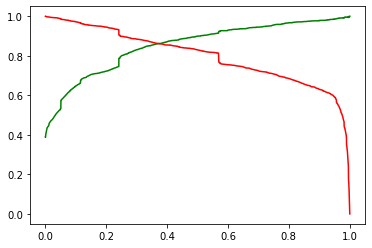

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [130]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tag,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Potential Lead,City_Other Metro Cities,City_Thane & Outskirts
6921,1.414351,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5902,-0.532905,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
495,-0.868702,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3723,-0.892426,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
7926,-0.467206,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [131]:
X_test_sm = sm.add_constant(X_test)

In [132]:
y_test_pred = res.predict(X_test_sm)

In [133]:
y_test_pred[:10]

6921    0.466437
5902    0.041681
495     0.056991
3723    0.995390
7926    0.015820
7200    0.004135
7130    0.196318
4645    0.871023
6963    0.051881
3159    0.051729
dtype: float64

In [134]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [135]:
# Let's see the head
y_pred_1.head()

,0
6921,0.466437
5902,0.041681
495,0.056991
3723,0.995390
7926,0.015820


In [136]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [137]:
# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [138]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
y_pred_final.head()

,Converted,Lead ID,0
0,1,6921,0.466437
1,0,5902,0.041681
2,0,495,0.056991
3,1,3723,0.995390
4,0,7926,0.015820


In [141]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [142]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_Prob'], axis=1)
# Adding The lead score Column
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))


In [143]:
# Let's see the head of y_pred_final
y_pred_final.head(10)

,Lead ID,Converted,Converted_Prob,Lead_Score
0,6921,1,0.466437,47
1,5902,0,0.041681,4
2,495,0,0.056991,6
3,3723,1,0.995390,100
4,7926,0,0.015820,2
5,7200,0,0.004135,0
6,7130,0,0.196318,20
7,4645,1,0.871023,87
8,6963,0,0.051881,5
9,3159,0,0.051729,5


In [144]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [145]:
y_pred_final.head(10)

,Lead ID,Converted,Converted_Prob,Lead_Score,final_predicted
0,6921,1,0.466437,47,1
1,5902,0,0.041681,4,0
2,495,0,0.056991,6,0
3,3723,1,0.995390,100,1
4,7926,0,0.015820,2,0
5,7200,0,0.004135,0,0
6,7130,0,0.196318,20,0
7,4645,1,0.871023,87,1
8,6963,0,0.051881,5,0
9,3159,0,0.051729,5,0


In [146]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9040550325850832

In [147]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1585,  124],
       [ 141,  912]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8660968660968661

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.9274429490930368

### Final Observation on the test set -
1. Accuracy    - 90.4%
2. Sensitivity - 86.6%
3. Specificity - 92.7%